# **Stock Market Prediction and Forecasting using stacked LSTM**

# **Introduction**

**Long Short Term Memory (LSTM)** is a type of deep learning system that anticipates property leases. By leveraging its unique architecture and memory retention capabilities, LSTM offers an innovative approach to understand the house rent prediction patterns with extraordinary precision.

Rental markets are influenced by diverse factors, and LSTM’s ability to capture and remember long-term dependencies enables the modeling of complex relationships and the extraction of meaningful patterns from historical rental data. Moreover, LSTM networks can adapt to changing market trends, making them suitable for capturing evolving rental patterns and fluctuations. Continual training with new data ensures the model’s relevancy and accuracy in dynamic rental markets, making LSTM a powerful tool for generating accurate predictions and providing valuable insights to both tenants and landlords.

## **LOADING THE DATA**

In [4]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import math
warnings.filterwarnings('ignore')

# **EDA(Exploratory Data Analysis)**

## **Variables**

In [5]:
df = pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [6]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:
df.shape

(2035, 8)

In [9]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [12]:
df1 = df.reset_index()['Close']


In [13]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [15]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Text(0, 0.5, 'Close')

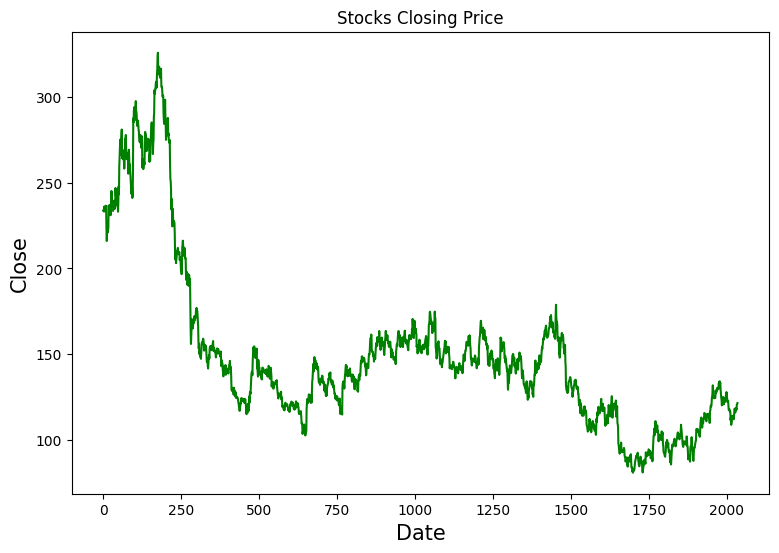

In [16]:
plt.figure(figsize = (9,6))
plt.title('Stocks Closing Price')
plt.plot(df['Close'],'g')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)

<Axes: >

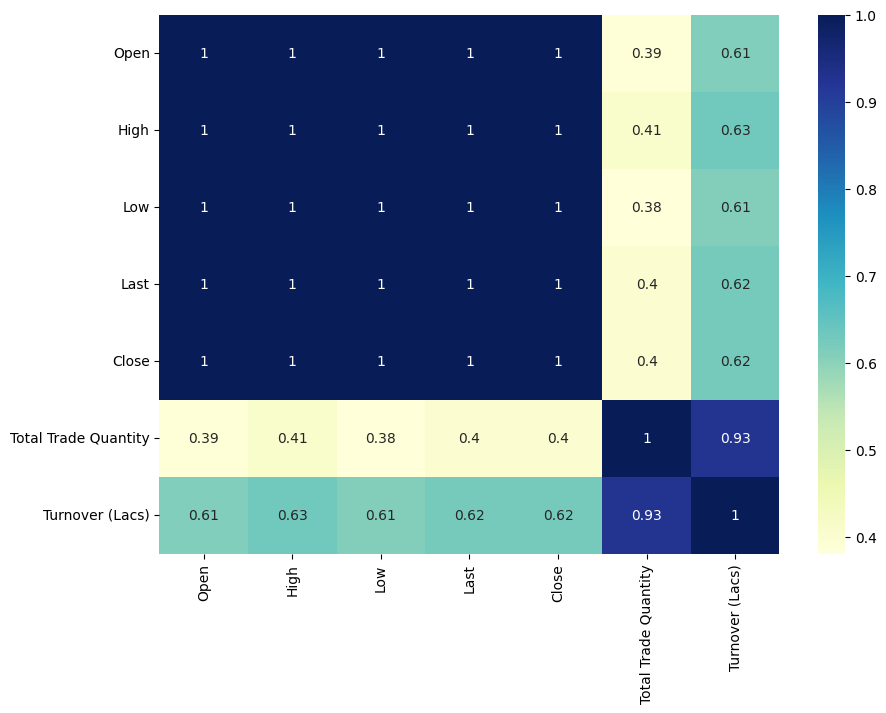

In [17]:
dcorr = df.corr()
top_corr_features = dcorr.index
plt.figure(figsize=(10,7))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="YlGnBu")

# **MinMaxScaler**
From the original dataset, we can tell that each of our target value are in close proximity to one another. So, we will use MinMaxScaler to scale down all the target variables in the range of (0, 1) for the ease of computation

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

## **Splitting train, Test data**

In [19]:
# split data train & test
training_size=int(len(df)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size

1322

In [20]:
test_size

713

In [22]:
train_data[0:5]

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       [0.63378268],
       [0.62234477]])

## Convert an array of values into a Dataset matrix

In [23]:
# convert an array of values into a Dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, dataX:0,1,2,3-----99   dataY:100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [24]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [25]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [26]:
print(X_test.shape), print(y_test.shape)

(612, 100)
(612,)


(None, None)

## Reshape input to be [samples, time steps, features] which is required for LSTM

In [46]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
!pip install tensorflow

# **LSTM Model**

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
20/20 [==============================] - 18s 289ms/step - loss: 0.0207 - val_loss: 0.0068
Epoch 2/10
20/20 [==============================] - 5s 228ms/step - loss: 0.0032 - val_loss: 7.8265e-04
Epoch 3/10
20/20 [==============================] - 6s 312ms/step - loss: 0.0017 - val_loss: 7.8471e-04
Epoch 4/10
20/20 [==============================] - 4s 210ms/step - loss: 0.0016 - val_loss: 9.2549e-04
Epoch 5/10
20/20 [==============================] - 4s 209ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/10
20/20 [==============================] - 5s 273ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 7/10
20/20 [==============================] - 4s 211ms/step - loss: 0.0022 - val_loss: 7.2479e-04
Epoch 8/10
20/20 [==============================] - 5s 230ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 9/10
20/20 [==============================] - 5s 239ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/10
20/20 [==============================] - 4s 209ms/step - loss: 0.0013 -

In [33]:
#Lets Do the prediction and check Performance Metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 39ms/step


In [34]:
#Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:

# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

168.20853799337962

In [36]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

119.45699187281039

## **PLOTTING**

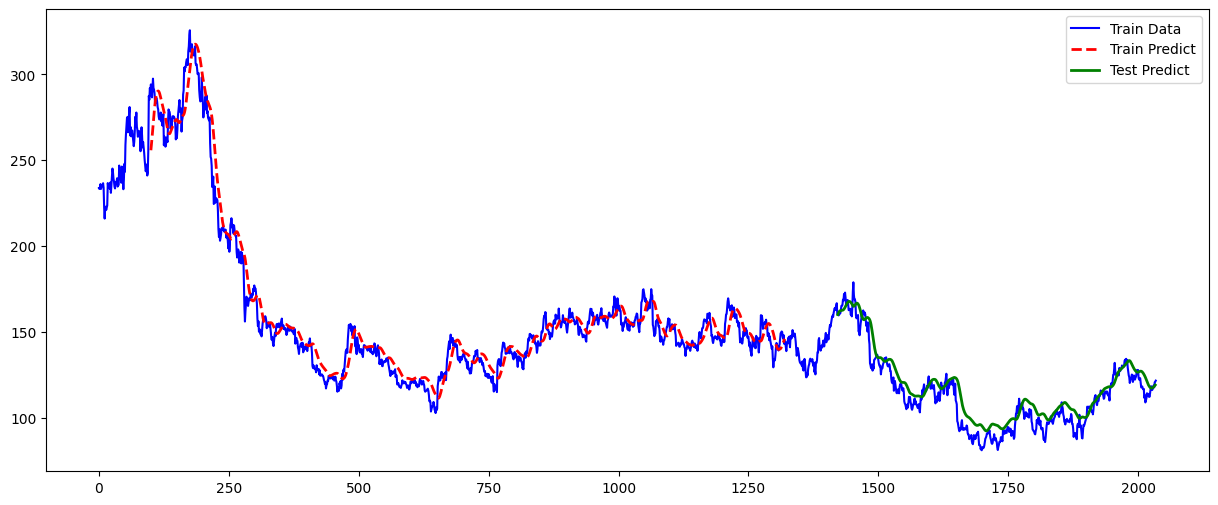

In [37]:
#Plotting Data

# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1), '-b', label='Train Data')
plt.plot(trainPredictPlot,'--r', label='Train Predict',linewidth=2.0)
plt.plot(testPredictPlot,'g', label='Test Predict', linewidth=2.0)
leg = plt.legend();
plt.show()

## **Future Prediction Model**

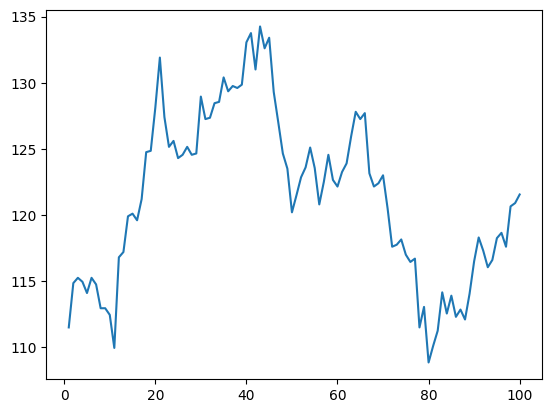

In [45]:
### Future Prediction Model
x_inum_pyut=testPredictPlot[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scaler.inverse_transform(df1[1935 : ]))